In [5]:
from google.colab import files
uploaded = files.upload()

Saving ETH_USD_2015-08-09_2021-06-08-CoinDesk.csv to ETH_USD_2015-08-09_2021-06-08-CoinDesk.csv


In [12]:
!ls -al
!pwd

total 152
drwxr-xr-x 1 root root   4096 Jun  8 14:20 .
drwxr-xr-x 1 root root   4096 Jun  8 14:14 ..
drwxr-xr-x 4 root root   4096 Jun  1 13:40 .config
-rw-r--r-- 1 root root 138007 Jun  8 14:20 ETH_USD_2015-08-09_2021-06-08-CoinDesk.csv
drwxr-xr-x 1 root root   4096 Jun  1 13:40 sample_data
/content


data length: 2131
The first 5 data:
 [[0.909046 1.749289 1.91654  0.794497]
 [0.692321 0.909046 0.909046 0.692321]
 [0.668067 0.692321 0.692321 0.654331]
 [0.850151 0.668067 1.148621 0.668067]
 [1.266023 0.850151 1.266023 0.850151]]


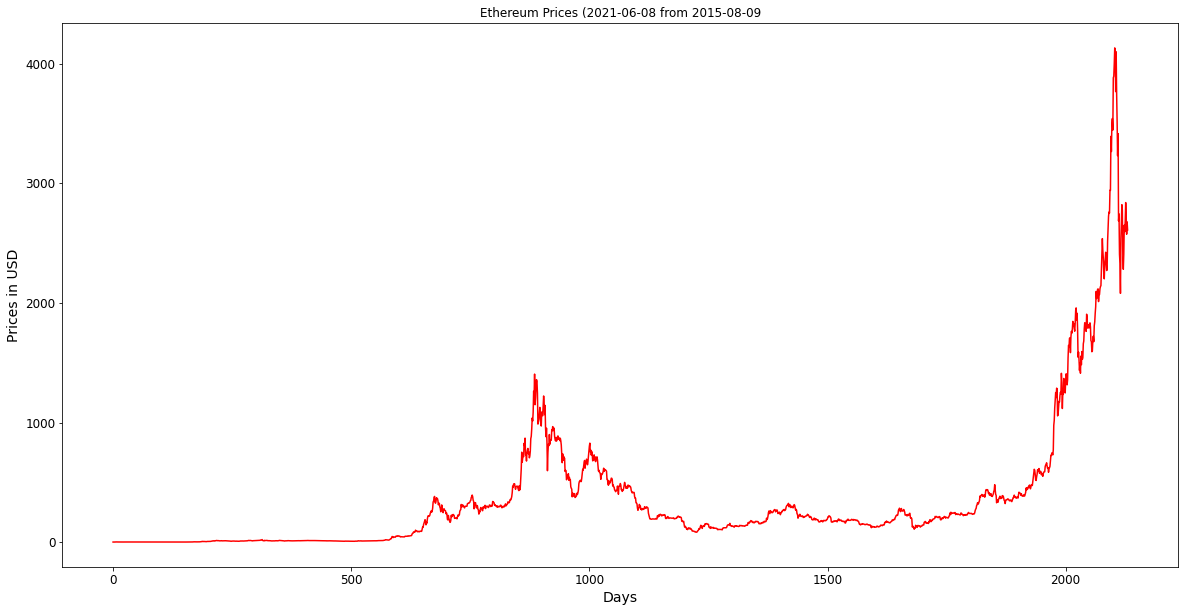

In [103]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

f = open('ETH_USD_2015-08-09_2021-06-08-CoinDesk.csv','r')
coindesk_data = pd.read_csv(f,header=0)
seq = coindesk_data[['Closing Price (USD)','24h Open (USD)', '24h High (USD)', '24h Low (USD)']].to_numpy()
data_length = len(seq)
print('data length:', data_length)
print('The first 5 data:\n', seq[:5])

# plotting
plt.figure(figsize=(20,10))
plt.plot(seq[:,0],color='red')
plt.title('Ethereum Prices (2021-06-08 from 2015-08-09')
plt.xlabel('Days')
plt.ylabel('Prices in USD')
plt.show()

### Split the Dataset

In [213]:
import numpy as np

def seq2dataset(seq, window, horizon):
  X=[]
  Y=[]
  for i in range(len(seq)-(window + horizon) + 1):
    x = seq[i:(i + window)]
    y = (seq[i + window + horizon - 1])
    X.append(x); Y.append(y)
  
  return np.array(X), np.array(Y)

#w = 7 # a week
w = 14 # fortnight
#w = 90 # three months
h = 1

X, Y = seq2dataset(seq,w,h)
print(X.shape, Y.shape,"\n")
print(X[0],"\n\n", Y[0])

(2117, 14, 4) (2117, 4) 

[[0.909046 1.749289 1.91654  0.794497]
 [0.692321 0.909046 0.909046 0.692321]
 [0.668067 0.692321 0.692321 0.654331]
 [0.850151 0.668067 1.148621 0.668067]
 [1.266023 0.850151 1.266023 0.850151]
 [1.95146  1.266023 2.073329 1.149458]
 [1.591219 1.95146  2.225695 1.591219]
 [1.693707 1.591219 1.76886  1.591219]
 [1.423244 1.693707 1.693707 1.099489]
 [1.199595 1.423244 1.469168 1.19379 ]
 [1.182837 1.199595 1.336878 0.918462]
 [1.279549 1.182837 1.306265 1.161387]
 [1.447462 1.279549 1.520993 1.219   ]
 [1.36656  1.447462 1.53824  1.36656 ]] 

 [1.320872 1.36656  1.532008 1.320872]


In [214]:
# Split the dataset
split_train = int(len(X)*0.8)
split_valid = int(len(X))
split_train_4 = int(split_train/4)
split_valid_4 = int(split_valid/4)
X_4 = int(len(X)/4)
print(split_train,split_valid,split_train_4,X_4)
# Train (data 4군데로 나눠서 순서대로 아니게 조정)
X_train = X[:split_train_4, :, [0]]; y_train=Y[:split_train_4, [0]]
X_train = np.reshape(np.append(X_train,X[X_4:X_4+split_train_4, :, [0]]),(split_train_4*2,14,1))
y_train = np.reshape(np.append(y_train,Y[X_4:X_4+split_train_4,[0]]),(split_train_4*2,1))

X_train = np.reshape(np.append(X_train,X[X_4*2:X_4*2+split_train_4, :, [0]]),(split_train_4*3,14,1))
y_train = np.reshape(np.append(y_train,Y[X_4*2:X_4*2+split_train_4, [0]]),(split_train_4*3,1))

X_train = np.reshape(np.append(X_train,X[X_4*3:X_4*3+split_train_4, :, [0]]),(split_train_4*4,14,1))
y_train = np.reshape(np.append(y_train,Y[X_4*3:X_4*3+split_train_4, [0]]),(split_train_4*4,1))

# Valid (train과 동일)
length = split_valid_4-split_train_4
print(length)
X_valid = X[split_train_4:split_valid_4,:, [0]]; y_valid=Y[split_train_4:split_valid_4,[0]]
X_valid = np.reshape(np.append(X_valid,X[X_4+split_train_4:X_4+split_valid_4,:, [0]]),(length*2,14,1))
y_valid = np.reshape(np.append(y_valid,Y[X_4+split_train_4:X_4+split_valid_4,[0]]),(length*2,1))

X_valid = np.reshape(np.append(X_valid,X[X_4*2+split_train_4:X_4*2+split_valid_4,:, [0]]),(length*3,14,1))
y_valid = np.reshape(np.append(y_valid,Y[X_4*2+split_train_4:X_4*2+split_valid_4,[0]]),(length*3,1))

X_valid = np.reshape(np.append(X_valid,X[X_4*3+split_train_4:X_4*3+split_valid_4,:, [0]]),(length*4,14,1))
y_valid = np.reshape(np.append(y_valid,Y[X_4*3+split_train_4:X_4*3+split_valid_4,[0]]),(length*4,1))

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

1693 2117 423 529
106
(1692, 14, 1) (1692, 1)
(424, 14, 1) (424, 1)


Linear predictions:

In [136]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[w, 1]),
    keras.layers.Dense(1)
])

# The default learning rate is 0.01 and no momentum is used by default.
# https://keras.io/api/optimizers/adam/
model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid))

Epoch 1/200
53/53 [==============================] - 0s 3ms/step - loss: 669654.9375 - val_loss: 4720990.0000
Epoch 2/200
53/53 [==============================] - 0s 2ms/step - loss: 348833.6250 - val_loss: 2272777.7500
Epoch 3/200
53/53 [==============================] - 0s 2ms/step - loss: 166119.3125 - val_loss: 1036433.0625
Epoch 4/200
53/53 [==============================] - 0s 2ms/step - loss: 74725.1406 - val_loss: 454835.2812
Epoch 5/200
53/53 [==============================] - 0s 1ms/step - loss: 33949.8711 - val_loss: 237249.2031
Epoch 6/200
53/53 [==============================] - 0s 2ms/step - loss: 18350.7949 - val_loss: 174890.8281
Epoch 7/200
53/53 [==============================] - 0s 2ms/step - loss: 13153.4316 - val_loss: 161892.7812
Epoch 8/200
53/53 [==============================] - 0s 2ms/step - loss: 11649.4443 - val_loss: 161244.5469
Epoch 9/200
53/53 [==============================] - 0s 1ms/step - loss: 11247.9434 - val_loss: 161969.2812
Epoch 10/200
53/53 [==

In [137]:
model.evaluate(X_valid, y_valid)

14/14 [==============================] - 0s 1ms/step - loss: 10679.8594


10679.859375

In [147]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#####################################################
## plot utility functions
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 200, 100, 100000])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss (MSE)")
    plt.grid(True)

def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    #plt.hlines(0, 0, 100, linewidth=1)
    #plt.axis([0, n_steps + 1, -1, 1])

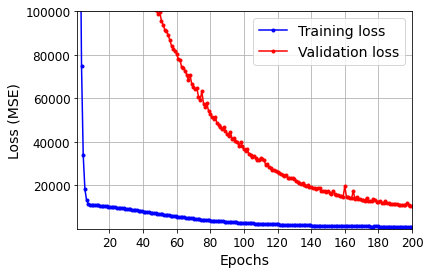

In [148]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

(424, 14, 1)
(424, 1)
gt: [11.74605]
pred: [11.675445]


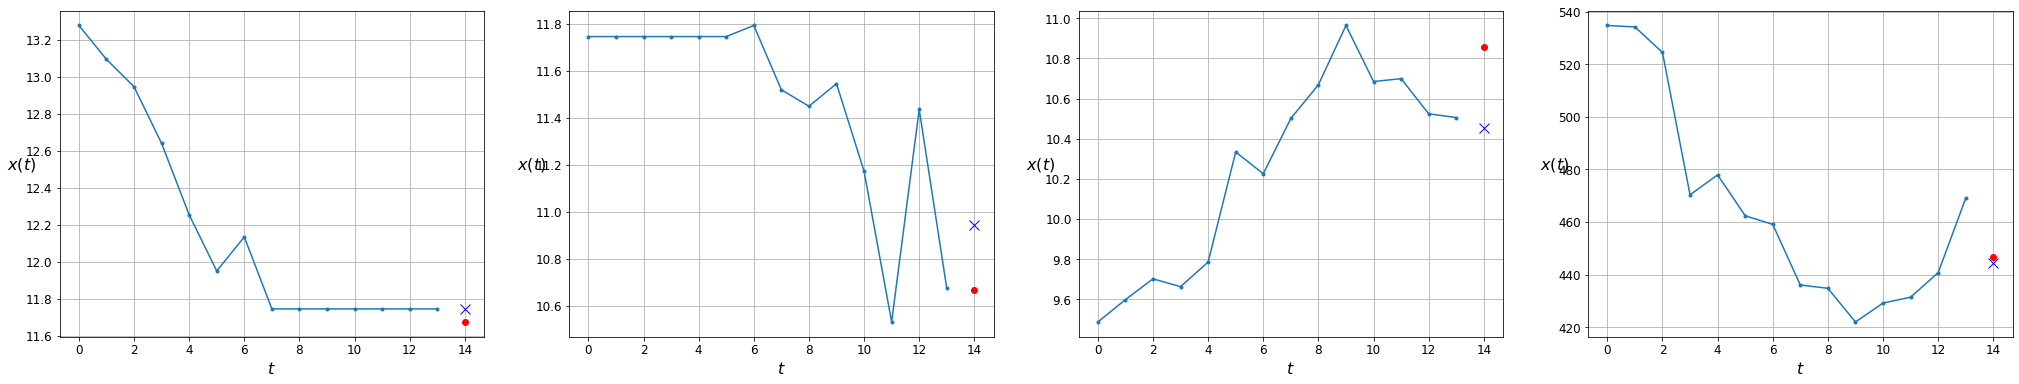

In [149]:
n_steps = 14

print(X_valid.shape)
y_pred = model.predict(X_valid)
print(y_pred.shape)

print("gt:", y_valid[0]) # blue
print("pred:", y_pred[0]) # red

plt.figure(figsize=(35,6))
plt.subplot(1,4,1)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.subplot(1,4,2)
plot_series(X_valid[14, :, 0], y_valid[14, 0], y_pred[14, 0])
plt.subplot(1,4,3)
plot_series(X_valid[100, :, 0], y_valid[100, 0], y_pred[100, 0])
plt.subplot(1,4,4)
plot_series(X_valid[200, :, 0], y_valid[200, 0], y_pred[200, 0])
plt.show()

##2. Using a Simple RNNs

In [150]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, activation='relu', input_shape=[None, 1])
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid))

Epoch 1/200
53/53 [==============================] - 1s 8ms/step - loss: 76191.2188 - val_loss: 471714.3438
Epoch 2/200
53/53 [==============================] - 0s 4ms/step - loss: 34161.0820 - val_loss: 251400.9375
Epoch 3/200
53/53 [==============================] - 0s 3ms/step - loss: 17608.2051 - val_loss: 160596.0781
Epoch 4/200
53/53 [==============================] - 0s 4ms/step - loss: 10607.4375 - val_loss: 115424.4219
Epoch 5/200
53/53 [==============================] - 0s 4ms/step - loss: 7227.5757 - val_loss: 90933.0469
Epoch 6/200
53/53 [==============================] - 0s 4ms/step - loss: 5444.7871 - val_loss: 75780.1250
Epoch 7/200
53/53 [==============================] - 0s 5ms/step - loss: 4435.1606 - val_loss: 67130.9922
Epoch 8/200
53/53 [==============================] - 0s 4ms/step - loss: 3858.5295 - val_loss: 62168.6680
Epoch 9/200
53/53 [==============================] - 0s 4ms/step - loss: 3536.0986 - val_loss: 58287.5508
Epoch 10/200
53/53 [==================

In [151]:
model.evaluate(X_valid, y_valid)

14/14 [==============================] - 0s 1ms/step - loss: 8720.9160


8720.916015625

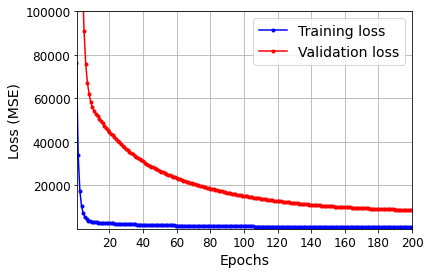

In [152]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

(424, 14, 1)
(424, 1)
gt: [11.74605]
pred: [12.380031]


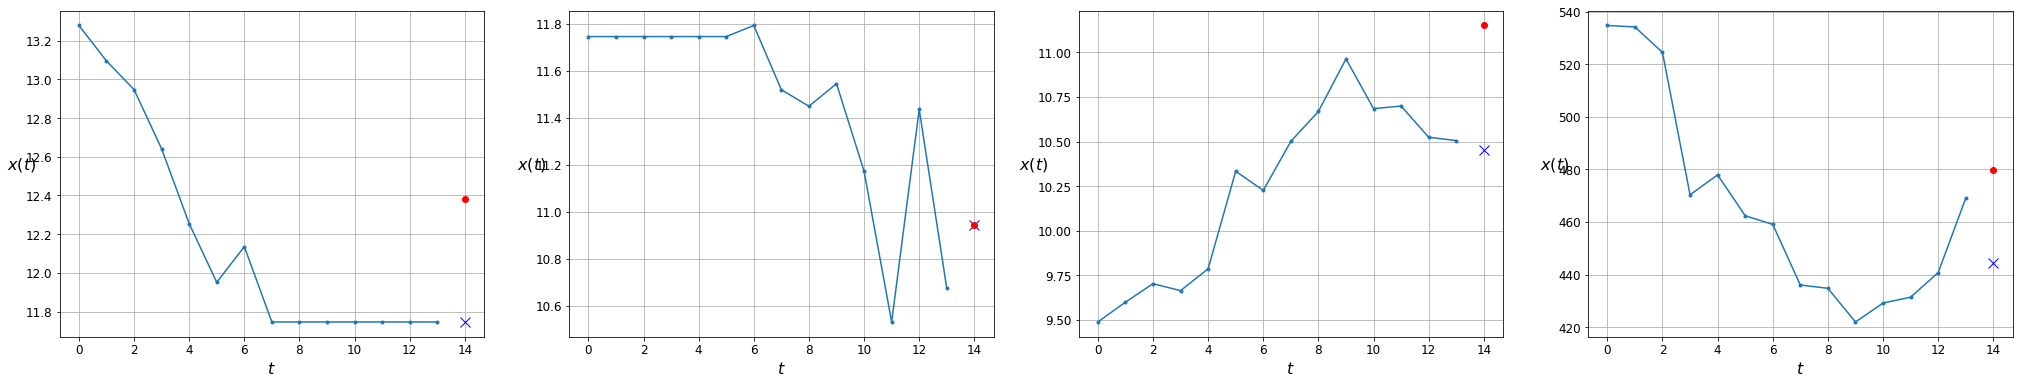

In [153]:
n_steps = 14

print(X_valid.shape)
y_pred = model.predict(X_valid)
print(y_pred.shape)

print("gt:", y_valid[0]) # blue
print("pred:", y_pred[0]) # red

plt.figure(figsize=(35,6))
plt.subplot(1,4,1)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.subplot(1,4,2)
plot_series(X_valid[14, :, 0], y_valid[14, 0], y_pred[14, 0])
plt.subplot(1,4,3)
plot_series(X_valid[100, :, 0], y_valid[100, 0], y_pred[100, 0])
plt.subplot(1,4,4)
plot_series(X_valid[200, :, 0], y_valid[200, 0], y_pred[200, 0])
plt.show()

##3. Deep RNNs

In [216]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(14, activation='relu', return_sequences=True,input_shape=[None, 1]),
    keras.layers.BatchNormalization(),
    keras.layers.SimpleRNN(14, activation='relu',return_sequences=True),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.003)
model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid))

Epoch 1/200
53/53 [==============================] - 3s 19ms/step - loss: 161222.0938 - val_loss: 1578208.1250
Epoch 2/200
53/53 [==============================] - 0s 7ms/step - loss: 159896.6094 - val_loss: 1563985.5000
Epoch 3/200
53/53 [==============================] - 0s 8ms/step - loss: 158607.3750 - val_loss: 1554410.7500
Epoch 4/200
53/53 [==============================] - 0s 9ms/step - loss: 157535.2969 - val_loss: 1543768.7500
Epoch 5/200
53/53 [==============================] - 0s 9ms/step - loss: 156368.1250 - val_loss: 1532436.8750
Epoch 6/200
53/53 [==============================] - 0s 9ms/step - loss: 154946.0625 - val_loss: 1524940.3750
Epoch 7/200
53/53 [==============================] - 0s 8ms/step - loss: 153226.4531 - val_loss: 1507304.5000
Epoch 8/200
53/53 [==============================] - 0s 9ms/step - loss: 151637.4219 - val_loss: 1487493.7500
Epoch 9/200
53/53 [==============================] - 0s 8ms/step - loss: 149750.8125 - val_loss: 1466156.6250
Epoch 10/

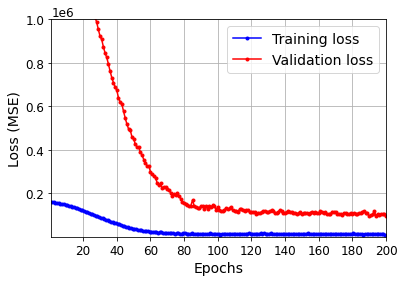

In [217]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.axis([1, 200, 100, 1000000])
plt.show()

(424, 14, 1)
(424, 14, 1)
gt: [11.74605]
pred: [[31.703913]
 [34.670654]
 [43.860966]
 [45.19197 ]
 [43.35875 ]
 [45.118225]
 [45.96381 ]
 [47.02507 ]
 [47.073803]
 [47.126415]
 [46.888474]
 [46.82029 ]
 [46.781334]
 [46.819965]]


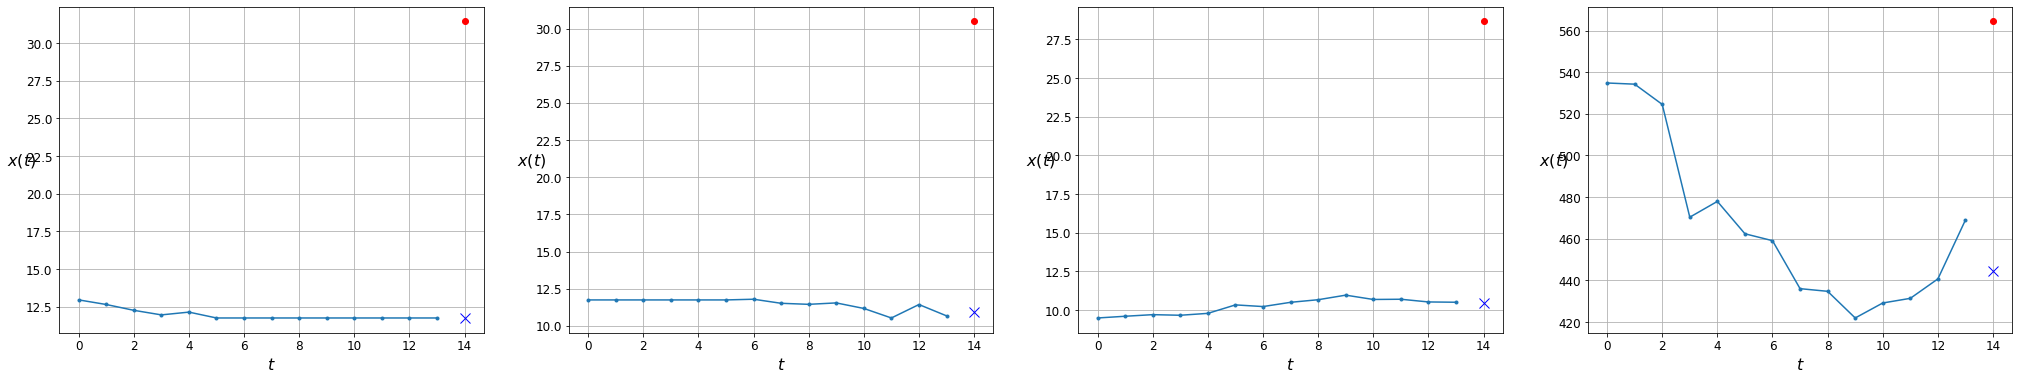

In [218]:
n_steps = 14

print(X_valid.shape)
y_pred = model.predict(X_valid)
print(y_pred.shape)

print("gt:", y_valid[0]) # blue
print("pred:", y_pred[0]) # red

plt.figure(figsize=(35,6))
plt.subplot(1,4,1)
plot_series(X_valid[2, :, 0], y_valid[2, 0], y_pred[2, 0])
plt.subplot(1,4,2)
plot_series(X_valid[14, :, 0], y_valid[14, 0], y_pred[14, 0])
plt.subplot(1,4,3)
plot_series(X_valid[100, :, 0], y_valid[100, 0], y_pred[100, 0])
plt.subplot(1,4,4)
plot_series(X_valid[200, :, 0], y_valid[200, 0], y_pred[200, 0])
plt.show()

##4. LSTMs

In [196]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.LSTM(128, activation='relu', input_shape=[None, 1]),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.004)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid))

Epoch 1/200
53/53 [==============================] - 3s 22ms/step - loss: 16700.9141 - val_loss: 60608.9727
Epoch 2/200
53/53 [==============================] - 1s 19ms/step - loss: 5182.9502 - val_loss: 61312.2734
Epoch 3/200
53/53 [==============================] - 1s 19ms/step - loss: 4138.8696 - val_loss: 54476.9492
Epoch 4/200
53/53 [==============================] - 1s 19ms/step - loss: 3945.1555 - val_loss: 22981.9648
Epoch 5/200
53/53 [==============================] - 1s 19ms/step - loss: 3688.3882 - val_loss: 62348.6797
Epoch 6/200
53/53 [==============================] - 1s 19ms/step - loss: 3132.7993 - val_loss: 32165.5781
Epoch 7/200
53/53 [==============================] - 1s 18ms/step - loss: 2099.4136 - val_loss: 22230.3965
Epoch 8/200
53/53 [==============================] - 1s 17ms/step - loss: 2458.1943 - val_loss: 18344.9160
Epoch 9/200
53/53 [==============================] - 1s 19ms/step - loss: 2181.8818 - val_loss: 30740.6055
Epoch 10/200
53/53 [================

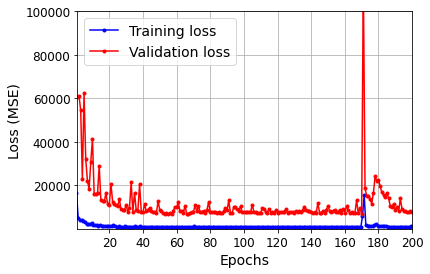

In [197]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.axis([1, 200, 100, 100000])
plt.show()

(424, 14, 1)
(424, 1)
gt: [11.74605]
pred: [11.9289465]


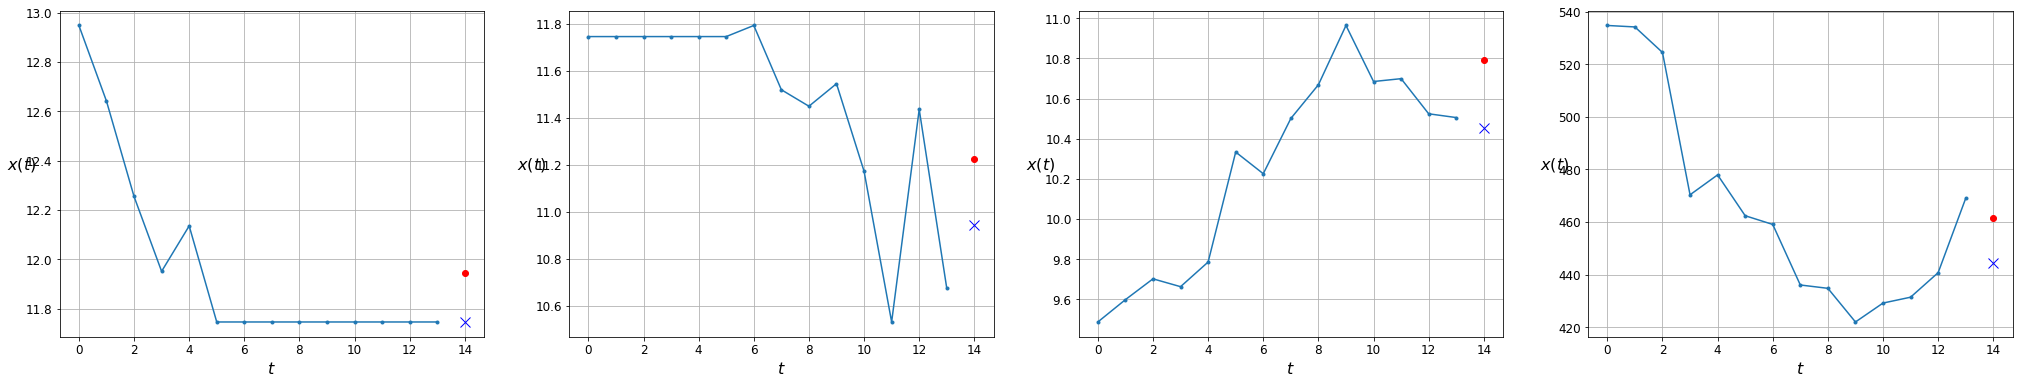

In [198]:
n_steps = 14

print(X_valid.shape)
y_pred = model.predict(X_valid)
print(y_pred.shape)

print("gt:", y_valid[0]) # blue
print("pred:", y_pred[0]) # red

plt.figure(figsize=(35,6))
plt.subplot(1,4,1)
plot_series(X_valid[2, :, 0], y_valid[2, 0], y_pred[2, 0])
plt.subplot(1,4,2)
plot_series(X_valid[14, :, 0], y_valid[14, 0], y_pred[14, 0])
plt.subplot(1,4,3)
plot_series(X_valid[100, :, 0], y_valid[100, 0], y_pred[100, 0])
plt.subplot(1,4,4)
plot_series(X_valid[200, :, 0], y_valid[200, 0], y_pred[200, 0])
plt.show()

## Forecasting Several Steps Ahead

In [203]:
def seq2dataset_long(seq, window, horizon):
  X=[]
  Y=[]
  for i in range(len(seq)-(window + horizon) + 1):
    x = seq[i:(i + window)]
    y = seq[i + window:i + window + horizon]
    X.append(x); Y.append(y)
  return np.array(X), np.array(Y)

w = 14
h = 5

X, Y = seq2dataset_long(seq,w,h)
print(X.shape, Y.shape)
#print(X[0], Y[0])

# Split the dataset
split_train = int(len(X)*0.8)

# Train
X_train = X[:split_train, :, [0]]; y_train=Y[:split_train, :, [0]]
# Valid
X_valid = X[split_train:,:, [0]]; y_valid=Y[split_train:,:,[0]]

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(2113, 14, 4) (2113, 5, 4)
(1690, 14, 1) (1690, 5, 1)
(423, 14, 1) (423, 5, 1)


In [204]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.SimpleRNN(5, activation='relu', input_shape=[None, 1])
])

optimizer = keras.optimizers.Adam(learning_rate=0.002)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid))

Epoch 1/200
53/53 [==============================] - 1s 8ms/step - loss: 92599.3594 - val_loss: 1329706.3750
Epoch 2/200
53/53 [==============================] - 0s 4ms/step - loss: 57606.2031 - val_loss: 967361.0625
Epoch 3/200
53/53 [==============================] - 0s 4ms/step - loss: 45018.1055 - val_loss: 665783.3125
Epoch 4/200
53/53 [==============================] - 0s 5ms/step - loss: 30426.4570 - val_loss: 514253.6562
Epoch 5/200
53/53 [==============================] - 0s 4ms/step - loss: 25395.5957 - val_loss: 460199.6562
Epoch 6/200
53/53 [==============================] - 0s 4ms/step - loss: 23055.1699 - val_loss: 425724.2812
Epoch 7/200
53/53 [==============================] - 0s 4ms/step - loss: 22115.9922 - val_loss: 416897.1875
Epoch 8/200
53/53 [==============================] - 0s 4ms/step - loss: 21573.8438 - val_loss: 409712.5625
Epoch 9/200
53/53 [==============================] - 0s 5ms/step - loss: 21362.0938 - val_loss: 405095.7812
Epoch 10/200
53/53 [=======

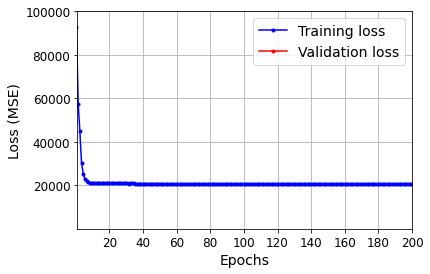

In [205]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [207]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.LSTM(128, activation='relu', input_shape=[None, 1]),
    keras.layers.Dense(5)
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid))

Epoch 1/200
53/53 [==============================] - 2s 24ms/step - loss: 23305.9141 - val_loss: 85393.7500
Epoch 2/200
53/53 [==============================] - 1s 17ms/step - loss: 3886.6597 - val_loss: 74889.0312
Epoch 3/200
53/53 [==============================] - 1s 18ms/step - loss: 4985.2959 - val_loss: 94930.4141
Epoch 4/200
53/53 [==============================] - 1s 18ms/step - loss: 3656.3767 - val_loss: 84177.5781
Epoch 5/200
53/53 [==============================] - 1s 20ms/step - loss: 3250.1533 - val_loss: 63510.0273
Epoch 6/200
53/53 [==============================] - 1s 18ms/step - loss: 2990.0793 - val_loss: 58837.4609
Epoch 7/200
53/53 [==============================] - 1s 17ms/step - loss: 2900.9890 - val_loss: 54121.6719
Epoch 8/200
53/53 [==============================] - 1s 18ms/step - loss: 3528.3691 - val_loss: 68667.7109
Epoch 9/200
53/53 [==============================] - 1s 18ms/step - loss: 3531.5989 - val_loss: 65480.2969
Epoch 10/200
53/53 [================

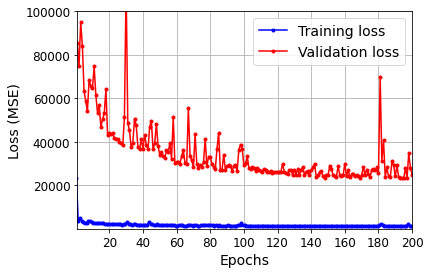

In [208]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [209]:
print(y_valid.shape)
y_pred = model.predict(X_valid)
print(y_pred.shape)

(423, 5, 1)
(423, 5)


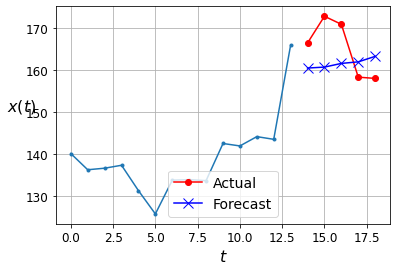

In [210]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :], "bx-", label="Forecast", markersize=10)
    #plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(loc='lower center',fontsize=14)

plot_multiple_forecasts(X_valid, y_valid, y_pred)